## **Amazon Sales Analysis**

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving amazon.csv to amazon (5).csv


In [ ]:
import pandas as pd
import scipy.stats as stats
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
#load dataset
df = pd.read_csv(io.BytesIO(uploaded['amazon (5).csv']))
# Dataset Structure
print(df.shape)
print()

# Define data types of all columns
df.info()
print()


(1465, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object

1:

H₀ (Null Hypothesis): There is no significant correlation between the discounted price and product ratings.

H₁ (Alternative Hypothesis): There is a significant correlation between the discounted price and product ratings.

Unique values in 'rating' column before cleaning:
[4.2 4.  3.9 4.1 4.3 4.4 4.5 3.7 3.3 3.6 3.4 3.8 3.5 4.6 3.2 5.  4.7 3.
 2.8 3.1 4.8 2.3 2.  2.6 2.9]
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
rating_category        0
main_category          0
dtype: int64

Spearman Correlation Coefficient:
0.08009599207411575

P-value:
0.00216245012002074

Reject the null hypothesis (H₀)


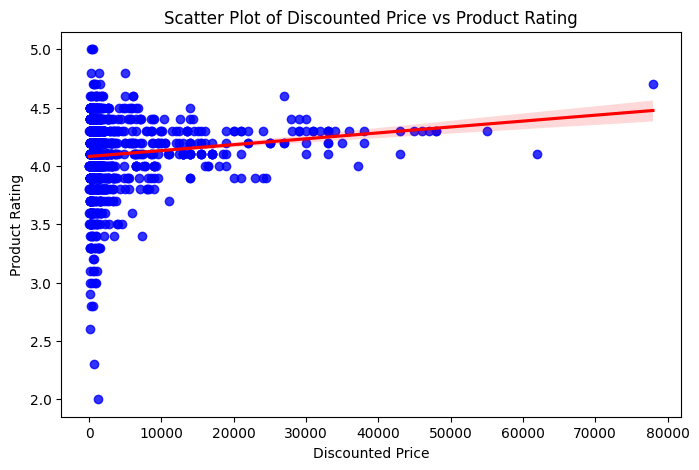

In [ ]:


# convert discounted_price to string
df['discounted_price'] = df['discounted_price'].astype(str)

# Clean discounted_price col
df['discounted_price'] = df['discounted_price'].str.replace('₹', '', regex=False)  # Remove '₹'
df['discounted_price'] = df['discounted_price'].str.replace(',', '', regex=False)  # Remove commas
df['discounted_price'] = df['discounted_price'].astype(float)  # Convert to float
print("Unique values in 'rating' column before cleaning:")
print(df['rating'].unique())


df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating'])

#  missing values
print(df.isnull().sum())
print()

# Spearman Rank Correlation Test
spearman_corr, p_value = stats.spearmanr(df['discounted_price'], df['rating'])

# Output the results
print("Spearman Correlation Coefficient:")
print(spearman_corr)
print()
print("P-value:")
print(p_value)
print()

# Hypothesis testing
if p_value < 0.05:
    print("Reject the null hypothesis (H₀)")
else:
    print("Fail to reject the null hypothesis (H₀)")

# Plot the regression plot
plt.figure(figsize=(8, 5))
sns.regplot(x=df['discounted_price'], y=df['rating'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel("Discounted Price")
plt.ylabel("Product Rating")
plt.title("Scatter Plot of Discounted Price vs Product Rating")
plt.show()

2:

Null Hypothesis (h0): Product categories and rating levels (High/Low) are independent—there is no significant relationship between them.


Alternative Hypothesis (h1): Product categories and rating levels (High/Low) are not independent—there is a significant relationship between them.

Chi-Square Statistic:
45.47643423075135

P-value:
0.00216245012002074

P-Degrees of Freedom::
8

Reject H0 


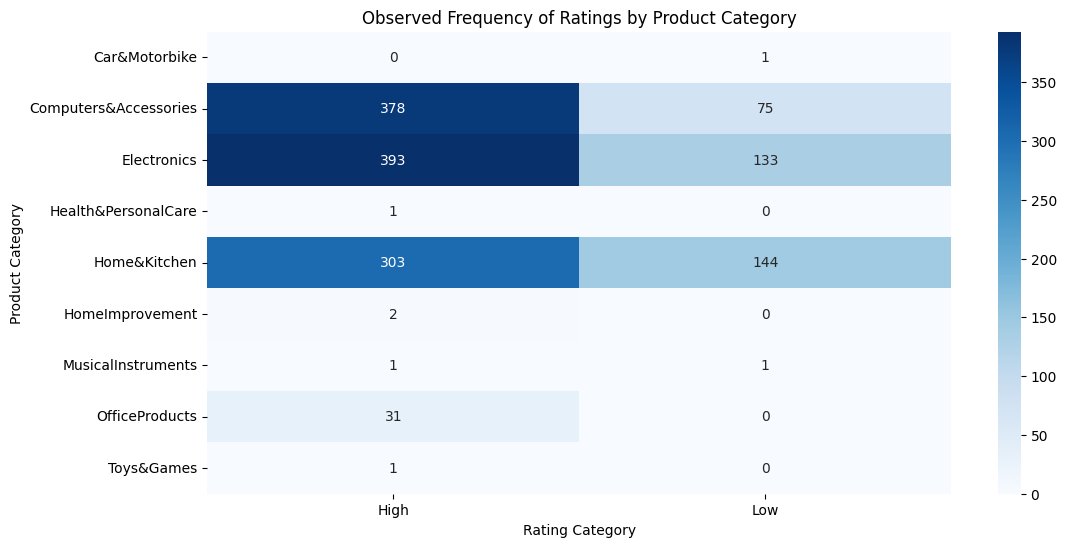

In [ ]:
#2

#rating column to numeric
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["rating_category"] = np.where(df["rating"] >= 4, "High", "Low")
df["main_category"] = df["category"].apply(lambda x: x.split("|")[0] if isinstance(x, str) else x)
contingency_table = pd.crosstab(df["main_category"], df["rating_category"])

# Perform the Chi-Square Test for Independence
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:")
print(chi2_stat)
print()
print("P-value:")
print(p_value)
print()
print("P-Degrees of Freedom::")
print(dof)
print()

if p_val < 0.05:
    print("Reject H0 ")
else:
    print("Fail to reject H0 ")

plt.figure(figsize=(12, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")
plt.title("Observd Ferequency of Ratings by Product Category")
plt.xlabel("Rating Category")
plt.ylabel("Product Category")
plt.show()


3:

H0 (Null Hypothesis): There is no significant difference in ratings between high-discount and low-discount products.

H1 (Alternative Hypothesis): There is a significant difference in ratings between high-discount and low-discount products.

T-statistic
-4.196144849743608

P-value:
2.888742811154432e-05

Reject the null hypothesis.



<ipython-input-48-d0a4b7bae1c1>:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([high_discount, low_discount], labels=['High Discount', 'Low Discount'])


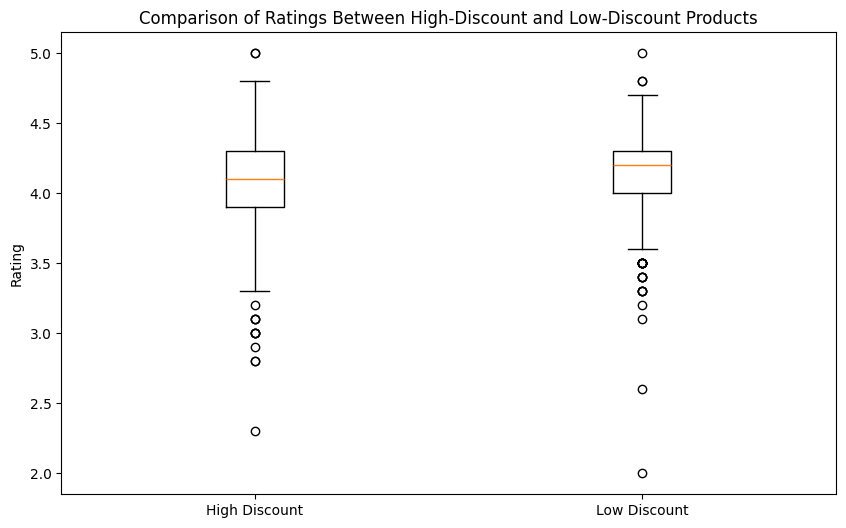

In [ ]:

if df['discount_percentage'].dtype == 'object':
    # If it's a string, remove '%' and convert to float
    df['discount_percentage'] = df['discount_percentage'].str.rstrip('%').astype(float)

# Ensure 'rating' is numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows where 'rating' is NaN
df = df.dropna(subset=['rating'])

#discount threshold
discount_threshold = 50

high_discount = df[df['discount_percentage'] > discount_threshold]['rating']
low_discount = df[df['discount_percentage'] <= discount_threshold]['rating']

# Perform the Independent Samples T-test
t_stat, p_value = stats.ttest_ind(high_discount, low_discount, equal_var=False)


print("T-statistic")
print(t_stat)
print()
print("P-value:")
print(p_value)
print()



if p_value < 0.05:
    print("Reject the null hypothesis.")
    print()
else:
    print("Fail to reject the null hypothesis")
    print()


plt.figure(figsize=(10, 6))
plt.boxplot([high_discount, low_discount], labels=['High Discount', 'Low Discount'])
plt.title('Comparison of Ratings Between High-Discount and Low-Discount Products')
plt.ylabel('Rating')
plt.show()

4:

H0 (Null Hypothesis): There is no significant difference in average ratings across different price groups.

H1 (Alternative Hypothesis): There is a significant difference in average ratings across different price groups.

f-statistic
0.7484963187018113

P-value:
0.47325869673150545

Fail to reject the null hypothesis



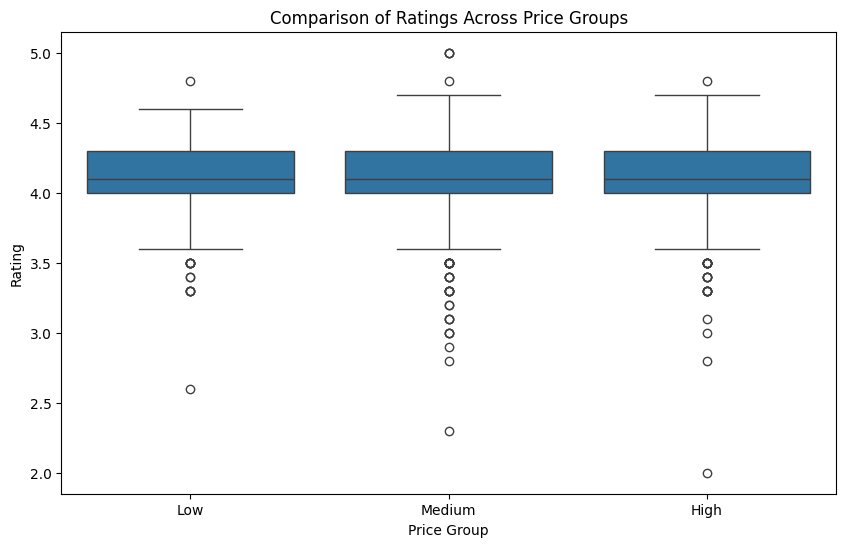

In [ ]:

# Convert 'actual_price' to numeric
df['actual_price'] = df['actual_price'].replace('[\₹,]', '', regex=True).astype(float)

# Convert 'rating' to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Drop rows where 'rating' is NaN
df = df.dropna(subset=['rating'])

# Define price groups (low, medium, high)
price_bins = [0, 500, 2000, float('inf')]
price_labels = ['Low', 'Medium', 'High']
df['price_group'] = pd.cut(df['actual_price'], bins=price_bins, labels=price_labels)

#  ANOVA test
groups = []
for group in price_labels:
    group_ratings = df[df['price_group'] == group]['rating']
    groups.append(group_ratings)
f_stat, p_value = stats.f_oneway(*groups)


print("f-statistic")
print(f_stat)
print()
print("P-value:")
print(p_value)
print()



if p_value < 0.05:
    print("Reject the null hypothesis.")
    print()
else:
    print("Fail to reject the null hypothesis")
    print()
# Plot the results
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_group', y='rating', data=df, order=price_labels)
plt.title('Comparison of Ratings Across Price Groups')
plt.xlabel('Price Group')
plt.ylabel('Rating')
plt.show()

5:

H0 (Null Hypothesis): The rating_count follows a normal distribution.

H1 (Alternative Hypothesis): The rating_count does not follow a normal distribution.

statistic
0.3343128982515293

P-value:
3.4888965453650775e-146

Reject the null hypothesis.



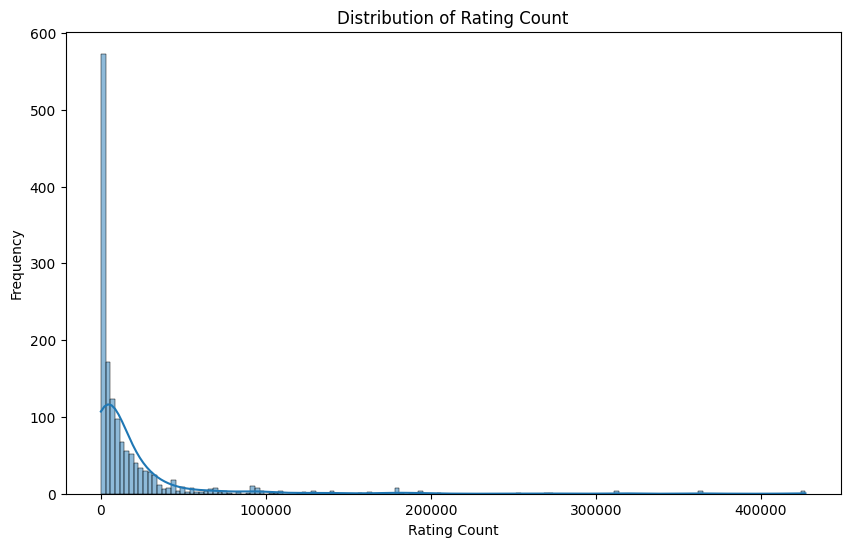

In [ ]:

# Convert 'rating_count' to numeric
df['rating_count'] = df['rating_count'].replace('[\,]', '', regex=True).astype(float)

# Drop rows where 'rating_count' is NaN
df = df.dropna(subset=['rating_count'])

#  Kolmogorov-Smirnov Test
ks_statistic, p_value = stats.kstest(df['rating_count'], 'norm', args=(df['rating_count'].mean(), df['rating_count'].std()))

print("statistic")
print(ks_statistic)
print()
print("P-value:")
print(p_value)
print()


if p_value < 0.05:
    print("Reject the null hypothesis.")
    print()
else:
    print("Fail to reject the null hypothesis")
    print()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['rating_count'], kde=True)
plt.title('Distribution of Rating Count')
plt.xlabel('Rating Count')
plt.ylabel('Frequency')
plt.show()